In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)

# Load data

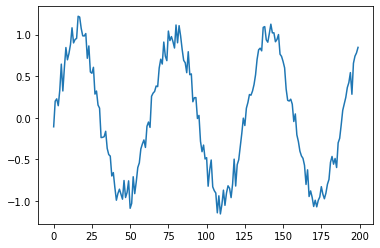

In [14]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series);

In [15]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
  X.append(series[t:t + T])
  Y.append(series[t + T])

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = X.shape[0]

print(X.shape)

(190, 10)


# Model

Epoch 1/80
3/3 [==============================] - 0s 70ms/step - loss: 0.3135 - val_loss: 0.1541
Epoch 2/80
3/3 [==============================] - 0s 28ms/step - loss: 0.1407 - val_loss: 0.1276
Epoch 3/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0858 - val_loss: 0.0420
Epoch 4/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0833 - val_loss: 0.0505
Epoch 5/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0580 - val_loss: 0.0693
Epoch 6/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0837 - val_loss: 0.0415
Epoch 7/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0573 - val_loss: 0.0424
Epoch 8/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0473 - val_loss: 0.0261
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0482 - val_loss: 0.0234
Epoch 10/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0444 - val_loss: 0.0342
Epoch 11/80
3/3 [============

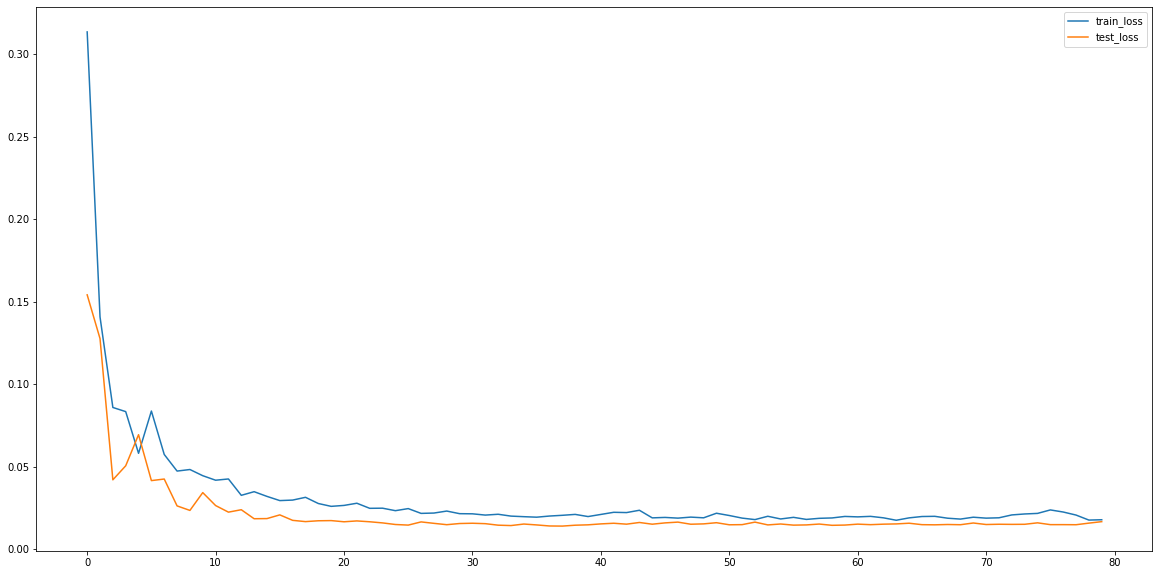

In [16]:
i = Input(shape=(T, ))
x = Dense(1)(i)

model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

idx = -N//2
history = model.fit(X[:idx], Y[:idx], epochs=80, validation_data=(X[idx:], Y[idx:]));

plt.figure(figsize=(20, 10))
plt.plot(history.history['loss'], label='train_loss');
plt.plot(history.history['val_loss'], label='test_loss');
plt.legend();

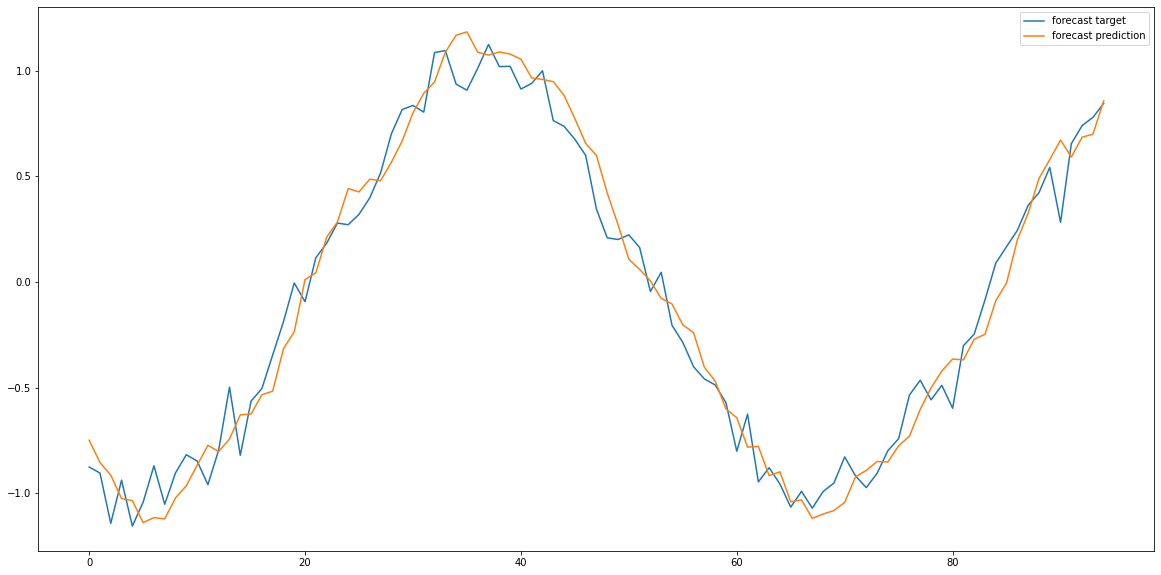

In [17]:
# one step predictions
Y1_hat = []
for x in X[idx:]:
  predictions = model.predict(x.reshape(1, T))
  Y1_hat.append(predictions[0][0])
Y1_hat = np.array(Y1_hat)

plt.figure(figsize=(20, 10))
plt.plot(Y[idx:], label='forecast target')
plt.plot(Y1_hat, label='forecast prediction')
plt.legend();

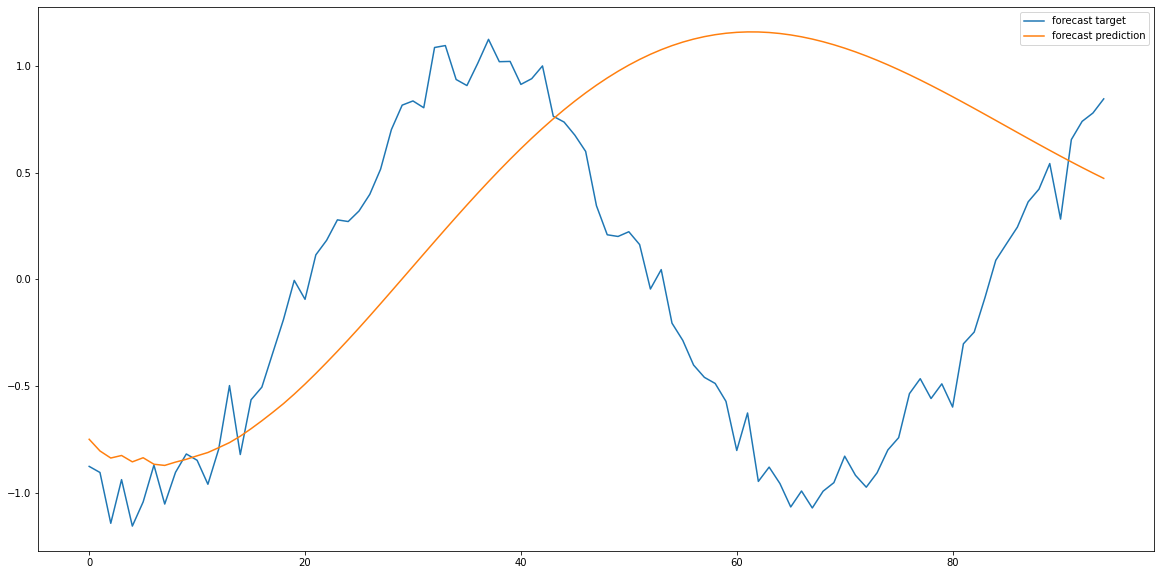

In [18]:
# future forecast predictions
Yn_hat = []
x = X[idx].copy()
for t in X[idx:]:
  predictions = model.predict(x.reshape(1, T))
  Yn_hat.append(predictions[0][0])
  x[:-1] = x[1:]
  x[-1] = predictions[0][0]
Yn_hat = np.array(Yn_hat)

plt.figure(figsize=(20, 10))
plt.plot(Y[idx:], label='forecast target')
plt.plot(Yn_hat, label='forecast prediction')
plt.legend();